In [7]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
pd.set_option('display.max_colwidth', -1)
import seaborn as sns
import nltk
nltk.download('wordnet')
import scattertext as st
import spacy

import en_core_web_sm
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

<ipython-input-7-840608f02993>:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shruthisundar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

ModuleNotFoundError: No module named 'scattertext'

In [8]:
def filler(text): 
    if text.dtype is pd.np.dtype(float): #if in the column the data type is a float/int, it replaces w an empty string
        return text.fillna('')
    elif text.dtype is pd.np.dtype(int): 
        return text.fillna('')
    else:
        return text.fillna('NA')

In [9]:
data=pd.read_csv('training_kids.csv', encoding='latin-1')

In [10]:
data.shape

(158, 2)

In [11]:
data.head(6)

,what_to_touch,creativity
0,doorknobs,0
1,chairs,0
2,pencils,0
3,computer,0
4,light switch,0
5,food,0


In [12]:
data = data.apply(filler)

<ipython-input-8-8e7d9e16f3db>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if text.dtype is pd.np.dtype(float): #if in the column the data type is a float/int, it replaces w an empty string
<ipython-input-8-8e7d9e16f3db>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  elif text.dtype is pd.np.dtype(int):


In [13]:
data.head(6)


,what_to_touch,creativity
0,doorknobs,0
1,chairs,0
2,pencils,0
3,computer,0
4,light switch,0
5,food,0


In [14]:
data.what_to_touch[:6]


0    doorknobs   
1    chairs      
2    pencils     
3    computer    
4    light switch
5    food        
Name: what_to_touch, dtype: object

In [15]:
data.what_to_touch=data.what_to_touch.str.replace('[^a-zA-Z]', ' ')

In [16]:
RE_PREPROCESS = r'\W+|\d+'  #raw string + alphanumeric character + one or more digits ( regular expressions)
data.what_to_touch = np.array( [ re.sub(RE_PREPROCESS, ' ', answer).lower() for answer in data.what_to_touch])

In [17]:
data.what_to_touch.head()

0    doorknobs   
1    chairs      
2    pencils     
3    computer    
4    light switch
Name: what_to_touch, dtype: object

In [18]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
#WordNetLemmatizer returns the input word unchanged if it cannot be found in WordNet.
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [19]:

from sklearn.feature_extraction.text import TfidfVectorizer
#TFidVectorizer converts a collection of raw documents to a matrix of TF-IDF features.

#“Term frequency–inverse document frequency, is a numerical statistic that is intended 
#to reflect how important a word is to a document in a collection or corpus.”
from sklearn import metrics

In [20]:
data.columns

Index(['what_to_touch', 'creativity'], dtype='object')

In [21]:
data['creativity'].value_counts()

1    99
0    59
Name: creativity, dtype: int64

In [83]:
from sklearn.model_selection  import train_test_split
X = data.what_to_touch
y = data['creativity']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=data['creativity'],random_state=2,shuffle=True)

In [84]:
data['creativity'].value_counts()
y_train

1    99
0    59
Name: creativity, dtype: int64

0      0
34     1
154    1
63     1
50     1
      ..
103    0
100    0
1      0
4      0
150    1
Name: creativity, Length: 126, dtype: int64

In [85]:
get_ipython().system('pip install nltk')
nltk.download('punkt')
get_ipython().system('pip install scikit-learn')

zsh:1: command not found: pip


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shruthisundar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

zsh:1: command not found: pip


In [86]:
vect=TfidfVectorizer(tokenizer=LemmaTokenizer(),stop_words='english',ngram_range=(1, 2))
vect.fit(X_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


TfidfVectorizer(ngram_range=(1, 2), stop_words='english',
                tokenizer=<__main__.LemmaTokenizer object at 0x7f95a92081c0>)

In [87]:
train=vect.transform(X_train) # transforming from string to vector (train and test models)
test=vect.transform(X_test)

In [88]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn import metrics

In [89]:
y_train=np.where(y_train==1, 1, 0)
y_test=np.where(y_test==1, 1, 0)

y_train.shape
y_test.shape

(126,)

(32,)

In [90]:
logreg = LogisticRegression(penalty='l2', C=0.2)
#fitting the logistical regression w x and y training subsets, and using the training subset to predict the testing
logreg.fit(train, y_train)
output_log = logreg.predict(test)

LogisticRegression(C=0.2)

In [91]:
y_true = y_test
y_pred = output_log
#the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.3125, 0.5, 0.38461538461538464, None)

0.625

In [92]:
#predicting the testing set using trained, and calculating the roc auc score, which is the area under the curve
y_pred_prob_log =logreg.predict_proba(test)[:, 1]
metrics.roc_auc_score(y_true, y_pred_prob_log)

0.5833333333333333

In [109]:
nb = MultinomialNB(alpha=0.2)
nb.fit(train, y_train)
output_nb = nb.predict(test)

MultinomialNB(alpha=0.2)

In [110]:
y_true = y_test
y_pred = output_nb
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.6609195402298851, 0.5583333333333333, 0.5210884353741496, None)

0.65625

In [111]:
y_pred_prob_nb =nb.predict_proba(test)[:, 1]
metrics.roc_auc_score(y_true, y_pred_prob_nb)

0.5833333333333333

In [112]:
rf = RandomForestClassifier(n_estimators = 25)
rf.fit(train,y_train)
output_rf = rf.predict(test)

RandomForestClassifier(n_estimators=25)

In [113]:
y_true = y_test
y_pred = output_rf
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.8225806451612903, 0.5416666666666666, 0.46907993966817496, None)

0.65625

0.5851851851851853

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1])

Text(0.5, 1.0, 'Receiver Operating Characteristic for Toxic classifier')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

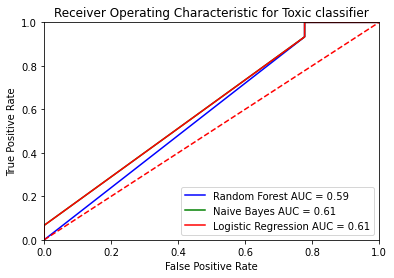

In [31]:
y_pred_prob_rf =rf.predict_proba(test)[:, 1]
metrics.roc_auc_score(y_true, y_pred_prob_rf)
y_train

fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_pred_prob_log)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, y_pred_prob_nb)
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, y_pred_prob_rf)
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)
plt.title('Receiver Operating Characteristic for Toxic classifier')

plt.plot(fpr3, tpr3, 'b', label = 'Random Forest AUC = %0.2f' % roc_auc3)
plt.plot(fpr2, tpr2, 'g', label = 'Naive Bayes AUC = %0.2f' % roc_auc2)
plt.plot(fpr1, tpr1, 'r', label = 'Logistic Regression AUC = %0.2f' % roc_auc1)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()